In [38]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

hyundai2009 = 90832

In [ ]:
#scrape

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
    
carNames = []
carPrices = []
carKMS = []

for x in range(2000, 2010): #contains the year range minus the last year
    r = requests.get(f'https://www.carsguide.com.au/buy-a-car/all-used/all-states/all-locations/all-bodytypes/all-makes/?priceTo=5000&yearFrom={x}&yearTo={x}&distanceFromMe=Melbourne,VIC')
    soup = BeautifulSoup(r.content, 'lxml')
    #pull the info
    carList = soup.find_all('div', class_='carListing--content')
    for item in carList:
        for names in item.find_all('h5', {'class' : "carListing--textHeading" }):
            carNames.append(names.get_text())
    for item in carList:
        for prices in item.find_all('div', {'class' : 'carListing--priceDetails'}):
            carPrices.append(prices.get_text().strip()[1:7].replace(',', ''))
    for item in carList:
        for kms in item.find_all('li', class_='icon icon-gauge'):
            carKMS.append(kms.get_text().replace(',','').strip()[:].replace('km', ''))


#this is the resulting dictionary
item = {
    "Car Name": carNames,
    "Price": carPrices,
    'kms': carKMS
}

#bit of dataframe cleaning, also turns it into a csv
carInfoDF = pd.DataFrame(item)
carInfoDF = carInfoDF.replace(r'\n', '', regex=True)

carInfoDF.to_csv('CarsGuideScrape.csv', index = False, encoding='utf-8')


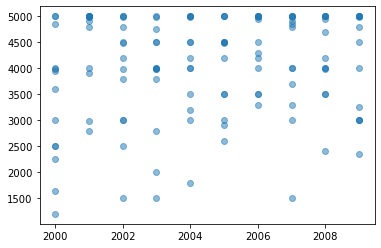

In [83]:
#read the csv, turn it back into a dataframe and get to the analysis

carDF = pd.read_csv(r'C:\Users\ranga\Desktop\PyProjects\CarsGuideScrape.csv')

#add a new column to utilise the date of the cars
carDF['Date'] = carDF['Car Name'].astype(str).str[:4]

#turn the date column into a number so that maths will work on it
carDF['Date'] = pd.to_numeric(carDF['Date'])

#visualize the data
plt.scatter('Date', 'Price', data = carDF, alpha = 0.5)


In [91]:
#work out the $$ value of each kilometer of a used car
carDF['perKilometer'] = carDF['Price'] / carDF['kms']
#group by year and take the average
carDFAVG = carDF.groupby('Date')['perKilometer'].mean()
print(carDFAVG)

Date
2000    0.640410
2001    0.021106
2002    0.016163
2003    0.018040
2004    0.017561
2005    0.019812
2006    0.021822
2007    1.100380
2008    0.021905
2009    0.025935
Name: perKilometer, dtype: float64


In [39]:
#initial attempt, 2009 Hyundai with 90832 kms
carPrice1st = hyundai2009 * .025935
print(carPrice1st)

2355.72792


In [40]:
#this is a bit low, lets try something else
carlowKs = carDF[carDF['kms'] < 100000]

#lets try it again with these other cars
carlowKsAVG = carlowKs.groupby('Date')['perKilometer'].mean()
print(carlowKsAVG)

Date
2000    8.116883
2001    0.039867
2007    7.041318
2009    0.049640
Name: perKilometer, dtype: float64


In [41]:
carPrice2nd = hyundai2009 * .049640
print(carPrice2nd)

4508.900479999999
